<a href="https://colab.research.google.com/github/code3ngon/Graph-Theory/blob/master/Bivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install scikit-posthocs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro
from scipy.stats import pearsonr, spearmanr

In [3]:
df = pd.read_csv('clean1.csv')
df

product_type    sku      price  availability  number_of_products_sold  \
0      haircare   SKU0  69.808006            55                      802   
1      skincare   SKU1  14.843523            95                      736   
2      haircare   SKU2  11.319683            34                        8   
3      skincare   SKU3  61.163343            68                       83   
4      skincare   SKU4   4.805496            26                      871   
..          ...    ...        ...           ...                      ...   
95     haircare  SKU95  77.903927            65                      672   
96    cosmetics  SKU96  24.423131            29                      324   
97     haircare  SKU97   3.526111            56                       62   
98     skincare  SKU98  19.754605            43                      913   
99     haircare  SKU99  68.517833            17                      627   

    revenue_generated customer_demographics  stock_levels  lead_times  \
0         8661.996792            Non-binary            58           7   
1         7460.900065                Female            53          30   
2         9577.749626               Unknown             1          10   
3         7766.836426            Non-binary            23          13   
4         2686.505152            Non-binary             5           3   
..                ...                   ...           ...         ...   
95        7386.363944               Unknown            15          14   
96        7698.424766            Non-binary            67           2   
97        4370.916580                  Male            46          19   
98        8525.952560                Female            53           1   
99        9185.185829               Unknown            55           8   

    order_quantities  ...  location lead_time  production_volumes  \
0                 96  ...    Mumbai        29                 215   
1                 37  ...    Mumbai        23                 517   
2                 88  ...    Mumbai        12                 971   
3                 59  ...   Kolkata        24                 937   
4                 56  ...     Delhi         5                 414   
..               ...  ...       ...       ...                 ...   
95                26  ...    Mumbai        18                 450   
96                32  ...    Mumbai        28                 648   
97                 4  ...    Mumbai        10                 535   
98                27  ...   Chennai        28                 581   
99                59  ...   Chennai        29                 921   

   manufacturing_lead_time manufacturing_costs  inspection_results  \
0                       29           46.279879             Pending   
1                       30           33.616769             Pending   
2                       27           30.688019             Pending   
3                       18           35.624741                Fail   
4                        3           92.065161                Fail   
..                     ...                 ...                 ...   
95                      26           58.890686             Pending   
96                      28           17.803756             Pending   
97                      13           65.765156                Fail   
98                       9            5.604691             Pending   
99                       2           38.072899                Fail   

    defect_rates  transportation_modes   routes       costs  
0       0.226410                  Road  Route B  187.752075  
1       4.854068                  Road  Route B  503.065579  
2       4.580593                   Air  Route C  141.920282  
3       4.746649                  Rail  Route A  254.776159  
4       3.145580                   Air  Route A  923.440632  
..           ...                   ...      ...         ...  
95      1.210882                   Air  Route A  778.864241  
96      3.872048                  Road  Route A

Ai c√≥ chi ph√≠ th·∫•p nh·∫•t

In [4]:
costs_compare = (
    df.groupby('supplier_name')['costs']
      .agg(['mean', 'std', 'count'])
      .reset_index()
      .rename(columns={'mean': 'Mean Cost', 'std': 'Std', 'count': 'n'})
)

# Define z for 95% confidence interval
z = 1.96

costs_compare['CI Lower'] = costs_compare['Mean Cost'] - z * (costs_compare['Std'] / np.sqrt(costs_compare['n']))
costs_compare['CI Upper'] = costs_compare['Mean Cost'] + z * (costs_compare['Std'] / np.sqrt(costs_compare['n']))

costs_compare

supplier_name   Mean Cost         Std   n    CI Lower    CI Upper
0    Supplier 1  574.851139  266.728699  27  474.240493  675.461784
1    Supplier 2  515.027241  257.192232  22  407.553448  622.501034
2    Supplier 3  468.800102  296.831141  15  318.582818  619.017385
3    Supplier 4  521.810418  269.978457  18  397.086734  646.534102
4    Supplier 5  536.022730  213.727143  18  437.285827  634.759632

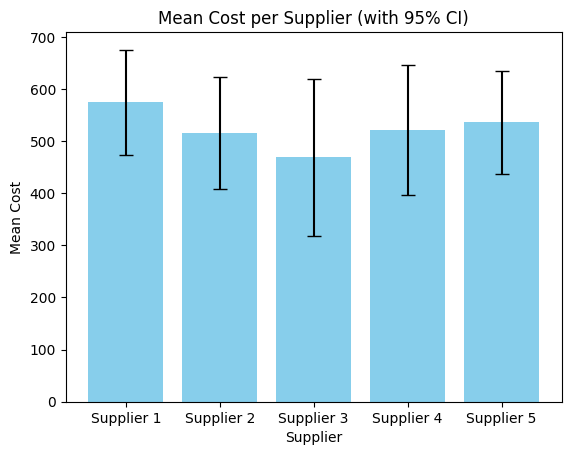

In [5]:
plt.bar(
    costs_compare['supplier_name'],
    costs_compare['Mean Cost'],
    yerr=costs_compare['Mean Cost'] - costs_compare['CI Lower'],
    capsize=5,
    color='skyblue'
)
plt.title('Mean Cost per Supplier (with 95% CI)')
plt.ylabel('Mean Cost')
plt.xlabel('Supplier')
plt.show()


C√°c kho·∫£ng n√†y ch·ªìng l·∫•n g·∫ßn nh∆∞ ho√†n to√†n.

Kh√¥ng th·ªÉ kh·∫≥ng ƒë·ªãnh m·ªôt supplier n√†o th·∫≠t s·ª± r·∫ª h∆°n c√°c supplier kh√°c v·ªÅ m·∫∑t th·ªëng k√™, v√¨ s·ª± kh√°c bi·ªát trung b√¨nh c√≥ th·ªÉ do ng·∫´u nhi√™n trong m·∫´u.

| ƒê·∫∑c ƒëi·ªÉm                       | Supplier 3                     |
| ------------------------------ | ------------------------------ |
| Mean th·∫•p nh·∫•t (468.8)         | ‚úÖ C√≥, t·ªët                      |
| S·ªë m·∫´u √≠t nh·∫•t (n=15)          | ‚ö†Ô∏è D·ªØ li·ªáu √≠t, ƒë·ªô tin c·∫≠y th·∫•p |
| ƒê·ªô l·ªách chu·∫©n cao nh·∫•t (296.8) | ‚ö†Ô∏è Chi ph√≠ bi·∫øn ƒë·ªông m·∫°nh      |
| CI r·ªông nh·∫•t (‚âà [319‚Äì619])     | ‚ö†Ô∏è ∆Ø·ªõc l∆∞·ª£ng k√©m ch√≠nh x√°c     |


‚üπ M·∫∑c d√π trung b√¨nh th·∫•p, Supplier 3 kh√¥ng ·ªïn ƒë·ªãnh v√† kh√¥ng ƒë·ªß b·∫±ng ch·ª©ng th·ªëng k√™ ƒë·ªÉ n√≥i r·∫±ng r·∫ª h∆°n h·∫≥n.

check ph√¢n ph·ªëi

In [6]:
for s in df['supplier_name'].unique():
    data = df[df['supplier_name']==s]['costs']
    stat, p = shapiro(data)
    print(f"{s}: p = {p:.4f}")


Supplier 3: p = 0.1493
Supplier 1: p = 0.0201
Supplier 5: p = 0.4419
Supplier 4: p = 0.1058
Supplier 2: p = 0.6539


| Supplier   | p-value | K·∫øt lu·∫≠n      |
| ---------- | ------- | ------------- |
| Supplier 1 | 0.0201  | ‚ùå Kh√¥ng chu·∫©n |
| Supplier 2 | 0.6539  | ‚úÖ G·∫ßn chu·∫©n   |
| Supplier 3 | 0.1493  | ‚úÖ G·∫ßn chu·∫©n   |
| Supplier 4 | 0.1058  | ‚úÖ G·∫ßn chu·∫©n   |
| Supplier 5 | 0.4419  | ‚úÖ G·∫ßn chu·∫©n   |


Kruskal Test

In [7]:
from scipy.stats import kruskal

# Gi·∫£ s·ª≠ df l√† DataFrame g·ªëc
groups = [df[df['supplier_name'] == s]['costs'] for s in df['supplier_name'].unique()]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic = {stat:.3f}, p-value = {p:.4f}")

if p < 0.05:
    print("=> C√≥ s·ª± kh√°c bi·ªát c√≥ √Ω nghƒ©a th·ªëng k√™ gi·ªØa c√°c supplier.")
else:
    print("=> Kh√¥ng c√≥ s·ª± kh√°c bi·ªát c√≥ √Ω nghƒ©a th·ªëng k√™ gi·ªØa c√°c supplier.")


Kruskal-Wallis H-statistic = 1.848, p-value = 0.7637
=> Kh√¥ng c√≥ s·ª± kh√°c bi·ªát c√≥ √Ω nghƒ©a th·ªëng k√™ gi·ªØa c√°c supplier.


Kh√¥ng c√≥ kh√°c bi·ªát l·ªõn v·ªÅ chi ph√≠ gi·ªØa c√°c supplier ‚Üí chi ph√≠ kh√¥ng ph·∫£i ti√™u ch√≠ ph√¢n bi·ªát r√µ r√†ng.

Ai mang l·∫°i doanh thu cao h∆°n

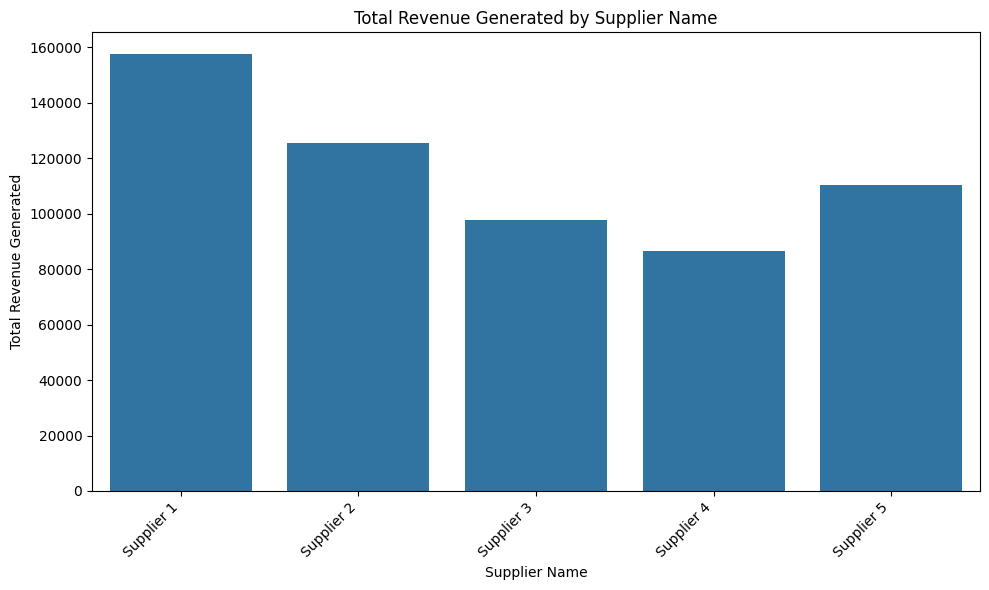

In [8]:
total_revenue_by_supplier = df.groupby('supplier_name')['revenue_generated'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='supplier_name', y='revenue_generated', data=total_revenue_by_supplier)
plt.title('Total Revenue Generated by Supplier Name')
plt.xlabel('Supplier Name')
plt.ylabel('Total Revenue Generated')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Supplier 1 mang l·∫°i doanh thu cao nh·∫•t

Ai c√≥ nƒÉng l·ª±c s·∫£n xu·∫•t cao nh·∫•t

In [9]:
prod_compare = (
    df.groupby('supplier_name')['production_volumes']
      .agg(['mean', 'std', 'count'])
      .reset_index()
      .rename(columns={'mean': 'Mean', 'std': 'Std', 'count': 'n'})
)

prod_compare['CI Lower'] = prod_compare['Mean'] - z * (prod_compare['Std'] / np.sqrt(prod_compare['n']))
prod_compare['CI Upper'] = prod_compare['Mean'] + z * (prod_compare['Std'] / np.sqrt(prod_compare['n']))

prod_compare


supplier_name        Mean         Std   n    CI Lower    CI Upper
0    Supplier 1  501.666667  237.248004  27  412.176203  591.157130
1    Supplier 2  641.136364  289.877198  22  520.004392  762.268335
2    Supplier 3  533.133333  227.891536  15  417.804304  648.462363
3    Supplier 4  653.111111  249.197745  18  537.987626  768.234596
4    Supplier 5  521.166667  288.480451  18  387.895498  654.437836

Test ph√¢n ph·ªëi

In [10]:
for s in df['supplier_name'].unique():
    data = df[df['supplier_name']==s]['production_volumes']
    stat, p = shapiro(data)
    print(f"{s}: p = {p:.4f}")


Supplier 3: p = 0.3658
Supplier 1: p = 0.1928
Supplier 5: p = 0.0148
Supplier 4: p = 0.0779
Supplier 2: p = 0.0271


Supplier 1, 3, 4 ‚Üí p > 0.05 ‚Üí d·ªØ li·ªáu g·∫ßn chu·∫©n

Supplier 2, 5 ‚Üí p ‚â§ 0.05 ‚Üí d·ªØ li·ªáu kh√¥ng chu·∫©n

‚üπ M·ªôt s·ªë supplier d·ªØ li·ªáu kh√¥ng chu·∫©n v√† n kh√¥ng b·∫±ng nhau.

Kruskal‚ÄìWallis test

In [11]:
from scipy.stats import kruskal
import scikit_posthocs as sp

groups = [df[df['supplier_name']==s]['production_volumes'] for s in df['supplier_name'].unique()]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H = {stat:.3f}, p = {p:.4f}")

# N·∫øu p < 0.05
if p < 0.05:
    posthoc = sp.posthoc_dunn(df, val_col='production_volumes', group_col='supplier_name', p_adjust='bonferroni')
    print(posthoc)


Kruskal-Wallis H = 6.186, p = 0.1857


üß† Di·ªÖn gi·∫£i

Null hypothesis (H0): t·∫•t c·∫£ c√°c supplier c√≥ c√πng ph√¢n ph·ªëi production_volumes (nƒÉng l·ª±c s·∫£n xu·∫•t).

p = 0.1857 > 0.05 ‚Üí kh√¥ng b√°c b·ªè H0.

‚û°Ô∏è Nghƒ©a l√†: kh√¥ng c√≥ b·∫±ng ch·ª©ng th·ªëng k√™ ƒë·ªÉ n√≥i r·∫±ng nƒÉng l·ª±c s·∫£n xu·∫•t c·ªßa c√°c supplier kh√°c nhau.

Trung b√¨nh (Mean) c√≥ th·ªÉ kh√°c nhau, v√≠ d·ª• Supplier 4 cao nh·∫•t, nh∆∞ng s·ª± kh√°c bi·ªát n√†y c√≥ th·ªÉ do ng·∫´u nhi√™n.

V√¨ v·∫≠y, kh√¥ng th·ªÉ kh·∫≥ng ƒë·ªãnh ch·∫Øc ch·∫Øn ai c√≥ nƒÉng l·ª±c s·∫£n xu·∫•t cao nh·∫•t d·ª±a v√†o d·ªØ li·ªáu hi·ªán t·∫°i.

Supplier n√†o v·ª´a r·∫ª v·ª´a √≠t l·ªói (t√¨m ƒëi·ªÉm c√¢n b·∫±ng)

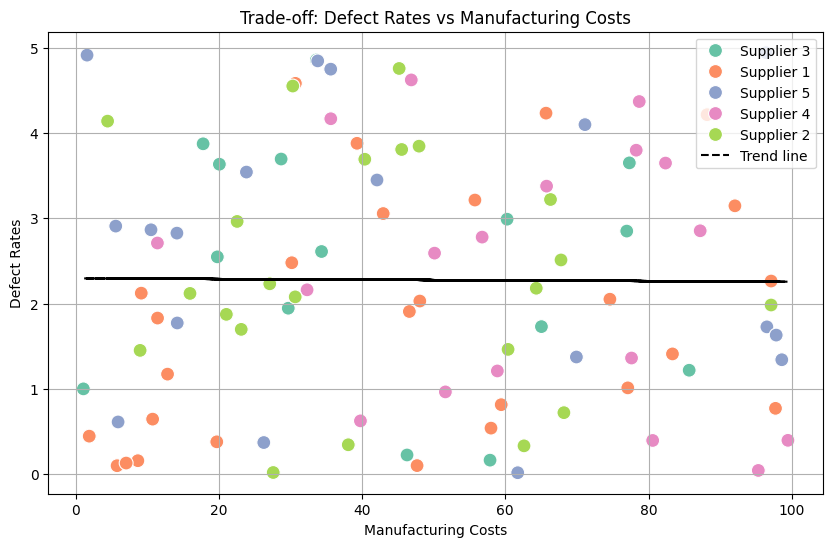

In [12]:
plt.figure(figsize=(10,6))

sns.scatterplot(
    data=df,
    x='manufacturing_costs',
    y='defect_rates',
    hue='supplier_name',
    s=100,
    palette='Set2'
)

# Trend line t·ªïng th·ªÉ
X = df['manufacturing_costs'].values.reshape(-1,1)
y = df['defect_rates'].values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(df['manufacturing_costs'], y_pred, color='black', linestyle='--', label='Trend line')

plt.xlabel('Manufacturing Costs')
plt.ylabel('Defect Rates')
plt.title('Trade-off: Defect Rates vs Manufacturing Costs')
plt.legend()
plt.grid(True)
plt.show()


Kh√¥ng c√≥ Trade-off.

C√≥ m·ªëi quan h·ªá ƒë√°nh ƒë·ªïi gi·ªØa chi ph√≠ v√† th·ªùi gian giao h√†ng kh√¥ng

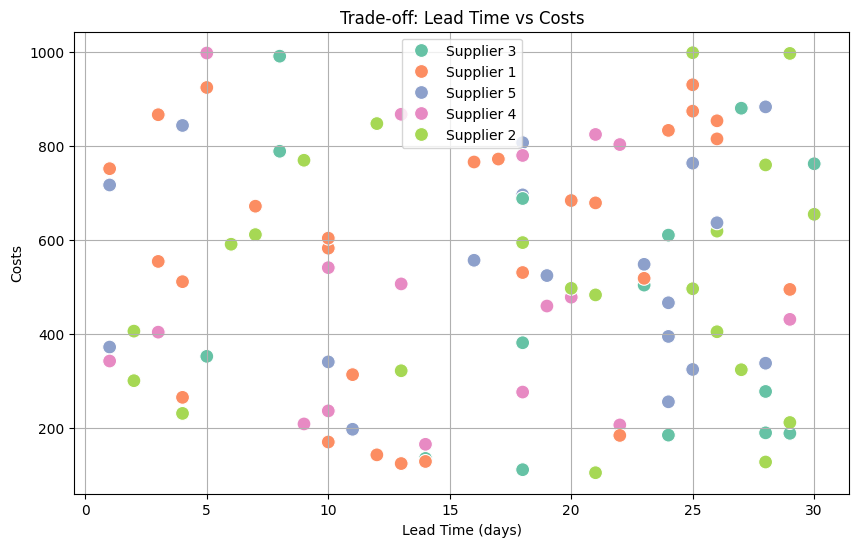

Pearson correlation: 0.045, p-value = 0.6551
Spearman correlation: 0.049, p-value = 0.6303


In [13]:
plt.figure(figsize=(10,6))

# Scatter plot
sns.scatterplot(
    data=df,
    x='lead_time',
    y='costs',
    hue='supplier_name',
    s=100,
    palette='Set2'
)

plt.xlabel('Lead Time (days)')
plt.ylabel('Costs')
plt.title('Trade-off: Lead Time vs Costs')
plt.grid(True)
plt.legend()
plt.show()

# Correlation
# Pearson (linear)
pearson_corr, p_pearson = pearsonr(df['lead_time'], df['costs'])
# Spearman (monotonic)
spearman_corr, p_spearman = spearmanr(df['lead_time'], df['costs'])

print(f"Pearson correlation: {pearson_corr:.3f}, p-value = {p_pearson:.4f}")
print(f"Spearman correlation: {spearman_corr:.3f}, p-value = {p_spearman:.4f}")


üß† Di·ªÖn gi·∫£i

C·∫£ Pearson v√† Spearman g·∫ßn b·∫±ng 0 ‚Üí kh√¥ng c√≥ m·ªëi quan h·ªá tuy·∫øn t√≠nh hay monotonic r√µ r√†ng gi·ªØa lead_time v√† costs.

p-value > 0.05 ‚Üí kh√¥ng c√≥ b·∫±ng ch·ª©ng th·ªëng k√™ cho th·∫•y chi ph√≠ tƒÉng/gi·∫£m ƒë√°ng k·ªÉ theo th·ªùi gian giao h√†ng.

‚û°Ô∏è N√≥i c√°ch kh√°c:

D·ªØ li·ªáu hi·ªán t·∫°i kh√¥ng cho th·∫•y trade-off r√µ r√†ng gi·ªØa chi ph√≠ v√† lead time.

Ki·ªÉm tra kh·∫£ nƒÉng ƒë√°p ·ª©ng ƒë∆°n h√†ng c·ªßa m·ªói supplier

In [14]:
summary = df.groupby('supplier_name')['lead_time'].agg(['mean','std','count']).reset_index()
summary['lower'] = summary['mean'] - summary['std']
summary['upper'] = summary['mean'] + summary['std']

summary

supplier_name       mean       std  count      lower      upper
0    Supplier 1  14.777778  8.550004     27   6.227774  23.327782
1    Supplier 2  18.545455  9.816057     22   8.729397  28.361512
2    Supplier 3  20.133333  8.279637     15  11.853697  28.412970
3    Supplier 4  15.222222  7.922830     18   7.299392  23.145053
4    Supplier 5  18.055556  9.032440     18   9.023116  27.087995

L·ª±a ch·ªçn T·ªët nh·∫•t: Supplier 4 l√† l·ª±a ch·ªçn t·ªïng th·ªÉ t·ªët nh·∫•t. H·ªç k·∫øt h·ª£p ƒë∆∞·ª£c c·∫£ hai y·∫øu t·ªë: giao h√†ng nhanh (th·ª© 2) v√† ·ªïn ƒë·ªãnh nh·∫•t (std th·∫•p nh·∫•t).

In [15]:
summary = df.groupby('supplier_name').agg(
    avg_stock=('stock_levels', 'mean'),
    avg_order=('order_quantities', 'mean'),
    std_stock=('stock_levels', 'std'),
    std_order=('order_quantities', 'std'),
    n=('stock_levels', 'count')
).reset_index()

summary


supplier_name  avg_stock  avg_order  std_stock  std_order   n
0    Supplier 1  42.296296  54.000000  33.025415  25.440731  27
1    Supplier 2  46.454545  46.454545  32.357714  25.902247  22
2    Supplier 3  43.600000  42.133333  28.657584  28.379738  15
3    Supplier 4  58.944444  46.777778  30.305255  29.262615  18
4    Supplier 5  49.888889  53.777778  31.180478  26.847183  18

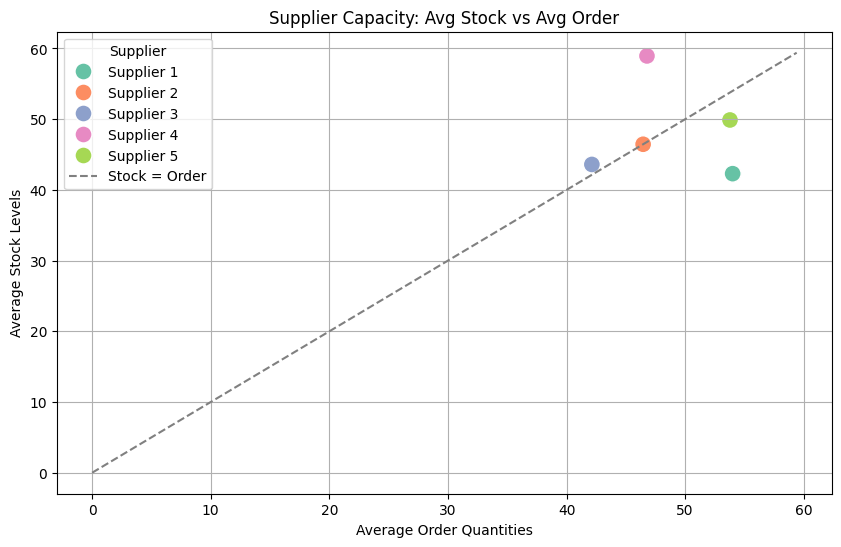

In [16]:
# --------- 2. Scatter plot theo supplier (mean) ---------
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=summary,
    x='avg_order',
    y='avg_stock',
    hue='supplier_name',
    s=150,
    palette='Set2'
)

# Th√™m line y=x ƒë·ªÉ tr·ª±c quan "ƒë·ªß stock vs thi·∫øu stock"
plt.plot([0, summary['avg_order'].max()*1.1], [0, summary['avg_order'].max()*1.1],
         color='gray', linestyle='--', label='Stock = Order')

plt.xlabel('Average Order Quantities')
plt.ylabel('Average Stock Levels')
plt.title('Supplier Capacity: Avg Stock vs Avg Order')
plt.grid(True)
plt.legend(title='Supplier')
plt.show()


| Supplier       | Nh·∫≠n x√©t                                           |
| -------------- | -------------------------------------------------- |
| Supplier 4     | NƒÉng l·ª±c ƒë√°p ·ª©ng **t·ªët nh·∫•t**, d∆∞ stock v√† ·ªïn ƒë·ªãnh |
| Supplier 3     | ƒê√°p ·ª©ng v·ª´a ƒë·ªß, kh√° ·ªïn ƒë·ªãnh                        |
| Supplier 2     | ƒê√°p ·ª©ng v·ª´a ƒë·ªß, trung b√¨nh ·ªïn ƒë·ªãnh                 |
| Supplier 1 & 5 | C√≥ nguy c∆° **thi·∫øu stock**, c·∫ßn theo d√µi k·ªπ        |


K·∫øt lo·∫°n: d·ª±a tr√™n Bivaritae Analysis c√≥ th·ªÉ v·ªõi m·ª•c ti√™u ch·ªçn Supplier th√¨ Supplier 4 c√≥ kh·∫£ nƒÉng l√† nh√† cung c·∫•p t√≥t nh·ª©t. Ph√¢n t√≠ch Bivaritae Analysis ch·ªß y·∫øu d·ª±a tr√™n performance c·ªßa supplier ch∆∞a x√©t t·ªõi c√°c y·∫øu t·ªë product hay manufacturing

